In [174]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re

In [175]:
#Check working directory and move it to the folder where I want to work
#%pwd
%ls
%cd BOSTONAIRBB

 Volume in drive C is OS
 Volume Serial Number is D25A-F071

 Directory of C:\Users\Stace\Documents\MIDS\Project2\BOSTONAIRBB

04/07/2017  03:14 PM    <DIR>          .
04/07/2017  03:14 PM    <DIR>          ..
04/03/2017  05:54 PM            36,550 bathrooms vs reviews per month.jpg
04/03/2017  05:52 PM            32,253 bedrooms vs reviews per month.jpg
03/31/2017  08:45 PM        33,521,941 calendar.csv
04/01/2017  09:39 PM                75 calendar_col_types.csv
04/03/2017  05:08 PM            23,345 data_merge_correlation_matrix.csv
04/06/2017  08:45 PM             5,709 datasample.csv
04/06/2017  08:45 PM            75,524 freq reviews.jpg
03/31/2017  08:46 PM        14,756,898 listings.csv
04/01/2017  05:04 PM             1,792 listings_columns.csv
04/07/2017  03:13 PM            20,721 listings_correlations.csv
04/01/2017  09:34 PM             2,185 lists_col_types.csv
04/03/2017  05:44 PM            41,795 Reviews per month vs Price.jpg
03/31/2017  08:44 PM        27,319,622 r

In [308]:
#read files
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv') #NOTE I changed the British for the 'Merican pronunciation
reviews = pd.read_csv('reviews.csv')


In [309]:
#Data manipulation steps to clean data for analysis

###################################      LISTINGS      ##################################################

#coerce appropriate fields to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = listings['price'].astype(float)

listings['zipcode'] = listings['zipcode'].str.replace('-','')
listings['zipcode'] = listings['zipcode'].str.replace(' ', '')
listings['mainzip'] = pd.Series([str(z)[:5] for z in listings['zipcode'].fillna('00000')]) ##THIS IS NOT WORKING AS I WANT IT TO; AIMING TO GRAB FIRST FIVE NUMBERS TO CREATE NEW FILE

#CLEANING FEE

listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$','')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace(',','')

listings['cleaning_fee'] = listings['cleaning_fee'].astype(float)

#CALENDAR LAST SCRAPED
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'])


##################################      REVIEWS       #####################################################
reviews['date'] = pd.to_datetime(reviews['date'])

##################################      CALENDAR       #####################################################
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['listing_id'] = calendar['listing_id'].astype('category')
calendar['price'] = calendar['price'].str.replace('$','')
calendar['price'] = calendar['price'].str.replace(',','')
calendar['price'].fillna(0)
calendar['price'] = calendar['price'].astype(float)



In [49]:
#understand the datatypes explicitly in the dataset
listings.dtypes
calendar.dtypes
reviews.dtypes

#check column names .columns

#check headers .head()

#check tails .tail()

#listings.columns
listings.tail()
#reviews.head()
#listings['neighborhood_overview'].head(5)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00
3584,14504422,https://www.airbnb.com/rooms/14504422,20160906204935,2016-09-07,(K1) Private Room near Harvard/MIT,My place is close to My home is a warm and fri...,To ensure a smooth check in: 1. You MUST have ...,My place is close to My home is a warm and fri...,none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,3,NaN


In [13]:
listings_column_names = pd.DataFrame((listings.columns))
listings_column_names_list = list(listings.columns)
object_first_observation = [listings[x].head(1) for x in listings_column_names_list]
observations = pd.DataFrame(object_first_observation)

In [14]:
observations.to_csv('datasample.csv')

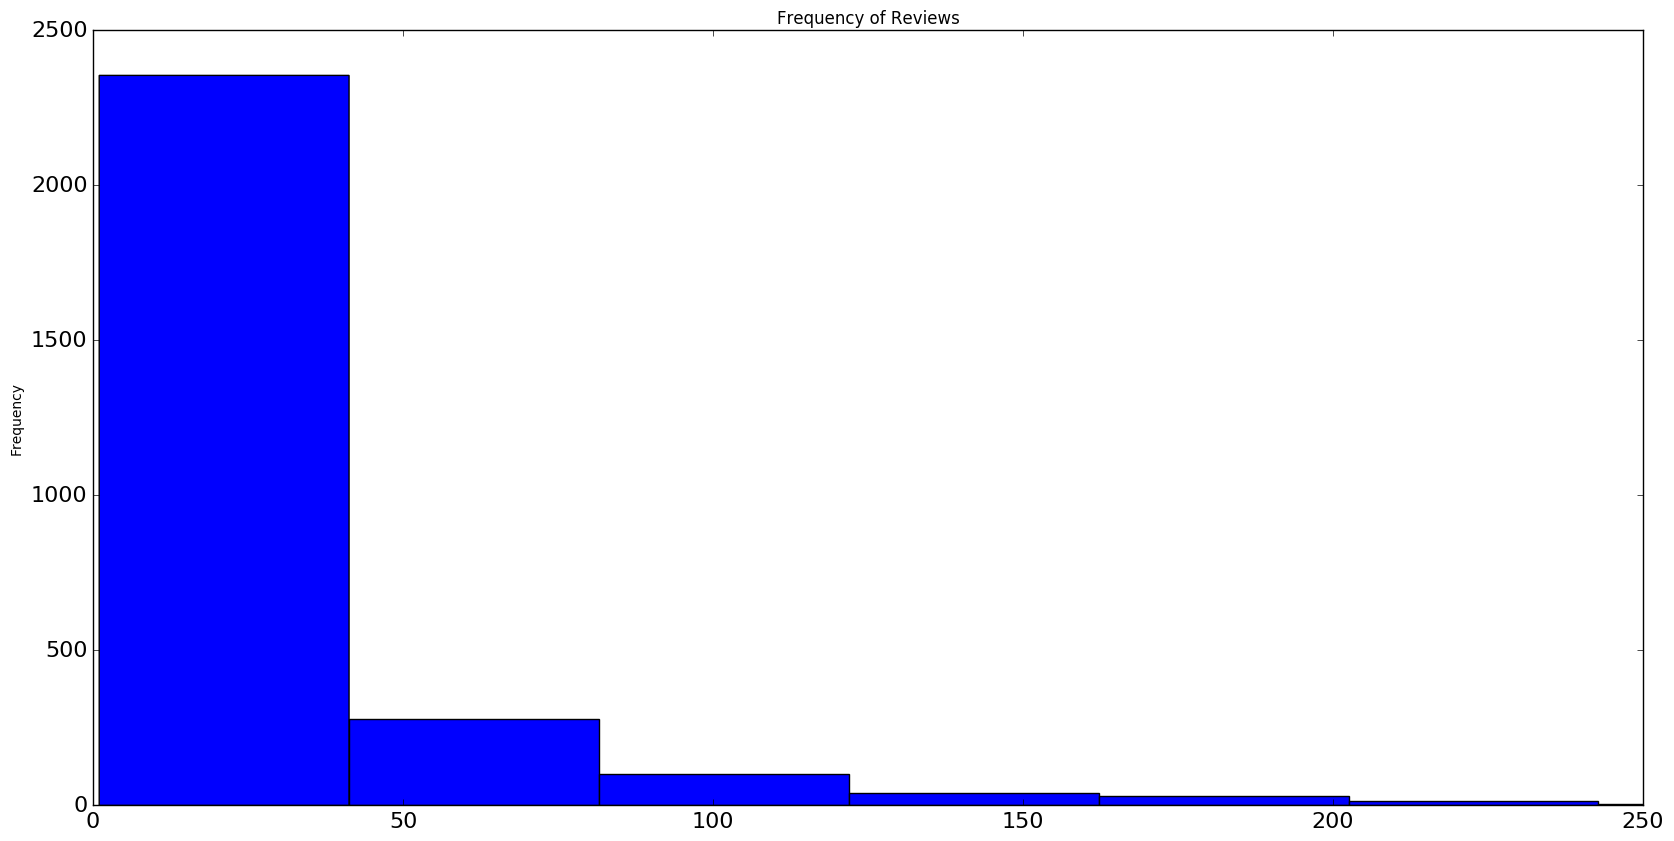

In [15]:
reviews['listing_id'].value_counts().plot(kind='hist', figsize = (20,10), fontsize = 16, title = 'Frequency of Reviews')
axes = plt.gca()
axes.set_xlim([0,250])
axes.set_ylim([0,2500])
plt.savefig('freq reviews.jpg')
#multi_reviews = (reviews['listing_id'].value_counts() > 1)
#multi_reviews.value_counts().plot(kind='bar')
#data = go.Histogram(x = multi_reviews)
#py.iplot(data, filename = 'reviewsmorethan1')

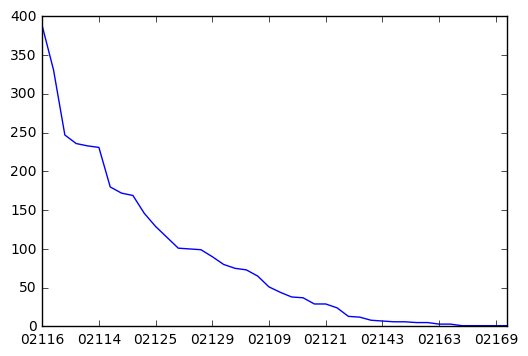

In [125]:
#listings['zipcode'].value_counts().plot(kind = 'bar')
zipcodes_listings = listings['mainzip'].value_counts()
zipcodes_listings.plot()

In [67]:
#plt.scatter(x = listings['host_response_time'], y = listings['review_scores_value'])
listings['host_response_time'].value_counts()
listings['host_response_time_categories'] = np.nan
listings.loc[listings['host_response_time'] == 'within an hour', 'host_response_time_categories'] = 0
listings.loc[listings['host_response_time'] == 'within a few hours', 'host_response_time_categories'] = 1
listings.loc[listings['host_response_time'] == 'within a day', 'host_response_time_categories'] = 2
listings.loc[listings['host_response_time'] == 'a few days or more', 'host_response_time_categories'] = 3

#df.loc[df['Sex'] == 'M', 'Sex_int'] = 0
#df.loc[df['Sex'] == 'F', 'Sex_int'] = 1

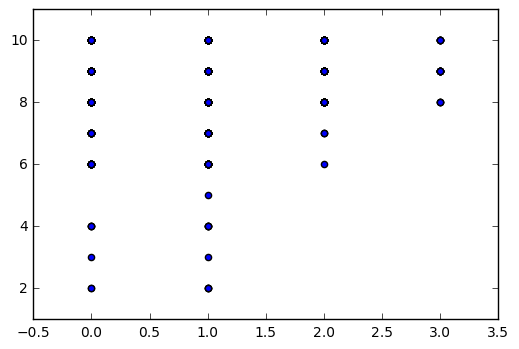

In [69]:
plt.scatter(x = listings['host_response_time_categories'], y = listings['review_scores_value'])

In [70]:
#plt.scatter(x= listings['zipcode'],y= listings['price'])
#plt.figsize()
#plt.xlabel('zipcode') #,fontsize = )
#plt.ylabel('price')
#fig.savefig('scatter.jpg')
listings['host_response_time'].value_counts()

within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

In [128]:
#listings.corr().to_csv('listings_correlations.csv')

In [104]:
split_amenities = listings['amenities'].str.split(',')
list_split_amenities = list(split_amenities)
new_list_split_amenities = list()
for i in list_split_amenities:
    for j in i:
        new_list_split_amenities.append(j)



In [130]:
#len(new_list_split_amenities)
reduced_new_list_split_amenities = list(set(new_list_split_amenities))
len(reduced_new_list_split_amenities)

85

In [313]:
#THIS CODE IS INTENDED TO FIND THE REVENUE 
listings_unique_ids = list(listings['id'].unique())
len(listings_unique_ids)


3585

In [299]:
#calendar.plot(kind ='panel')
#calendar.set_index = calendar['listing_id']

#sorted(calendar, key = lambda x: (x['listing_id'], x['date']))
calendar.groupby(['listing_id', 'date']).head()
calendar.sort_index(ascending = False)

#Capture median values
calendar[calendar['listing_id'] == 14504422]
count_for_id = calendar[(calendar['available'] == 'f') & (calendar['listing_id'] == 14504422)]['available'].count() 
mean_price =  calendar[(calendar['available'] == 't') & (calendar['listing_id'] == 14504422)]['price'].mean()

revenue_wo_cleaning = mean_price * count_for_id
revenue_wo_cleaning

12956.363636363636

In [286]:
for i in 
count_for_id = calendar[(calendar['available'] == 'f') & (calendar['listing_id'] == 14504422)]['available'].count() 
mean_price =  calendar[(calendar['available'] == 't') & (calendar['listing_id'] == 14504422)]['price'].mean()

64.78181818181818